In [1]:
import networkx as nx
import pandas as pd

import utils

# Apply methods from project thesis

In [2]:
n_benchmarks = 100

df = pd.read_csv('./Data/country_aggregated.csv')
graphs = utils.create_graphs_from_dataset(df)

Edge removed at random iteration 1: ('Hungary', 'Slovak Republic')
Edge removed at random iteration 1: ('Germany', 'Denmark')
Edge removed at random iteration 1: ('Hungary', 'Romania')
Edge removed at random iteration 1: ('Bulgaria', 'Republic of Türkiye')
Edge removed at random iteration 1: ('Spain', 'France')
Edge removed at random iteration 1: ('Spain', 'France')
Edge removed at random iteration 1: ('France', 'Spain')
Edge removed at random iteration 1: ('Liquefied Natural Gas', 'France')
Edge removed at random iteration 1: ('Liquefied Natural Gas', 'United Kingdom')
Edge removed at random iteration 1: ('Liquefied Natural Gas', 'Spain')
Edge removed at random iteration 1: ('Switzerland', 'Italy')
Edge removed at random iteration 1: ('Belgium', 'Netherlands')
Edge removed at random iteration 1: ('Bulgaria', 'Romania')
Edge removed at random iteration 1: ('Germany', 'Netherlands')
Edge removed at random iteration 1: ('Germany', 'Netherlands')
Edge removed at random iteration 1: ('Norw

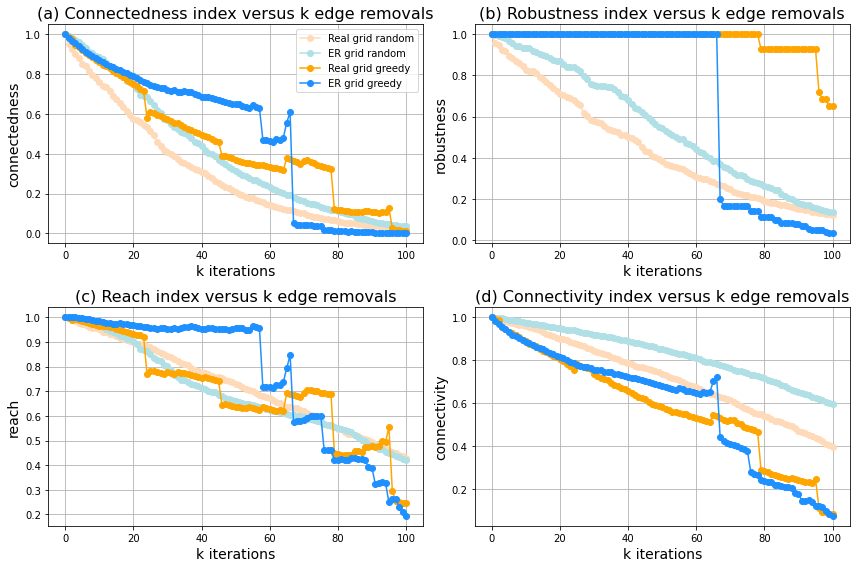

In [3]:
G = graphs[-1]
random_edge_results_df, _ = utils.n_minus_k(G, n_benchmarks=n_benchmarks, k_removals=100, heuristic='random', remove='edge')

G = graphs[-1]
greedy_edge_results_df, _ = utils.n_minus_k(G, n_benchmarks=n_benchmarks, k_removals=100, heuristic='greedy', remove='edge')

titles = ['(a) Connectedness index versus k edge removals', '(b) Robustness index versus k edge removals', '(c) Reach index versus k edge removals', '(d) Connectivity index versus k edge removals']

utils.plot_connectedness_fourway([random_edge_results_df, greedy_edge_results_df], titles)

Node removed at random iteration 1: Iran
Node removed at random iteration 1: Tunisia
Node removed at random iteration 1: Moldova
Node removed at random iteration 1: Albania
Node removed at random iteration 1: Austria
Node removed at random iteration 1: Bulgaria
Node removed at random iteration 1: Portugal
Node removed at random iteration 1: Germany
Node removed at random iteration 1: Hungary
Node removed at random iteration 1: Ireland
Node removed at random iteration 1: North Macedonia
Node removed at random iteration 1: Isle of Man
Node removed at random iteration 1: Tunisia
Node removed at random iteration 1: Latvia
Node removed at random iteration 1: Croatia
Node removed at random iteration 1: Finland
Node removed at random iteration 1: Denmark
Node removed at random iteration 1: Norway
Node removed at random iteration 1: Estonia
Node removed at random iteration 1: Greece
Node removed at random iteration 1: Belarus
Node removed at random iteration 1: Croatia
Node removed at random i

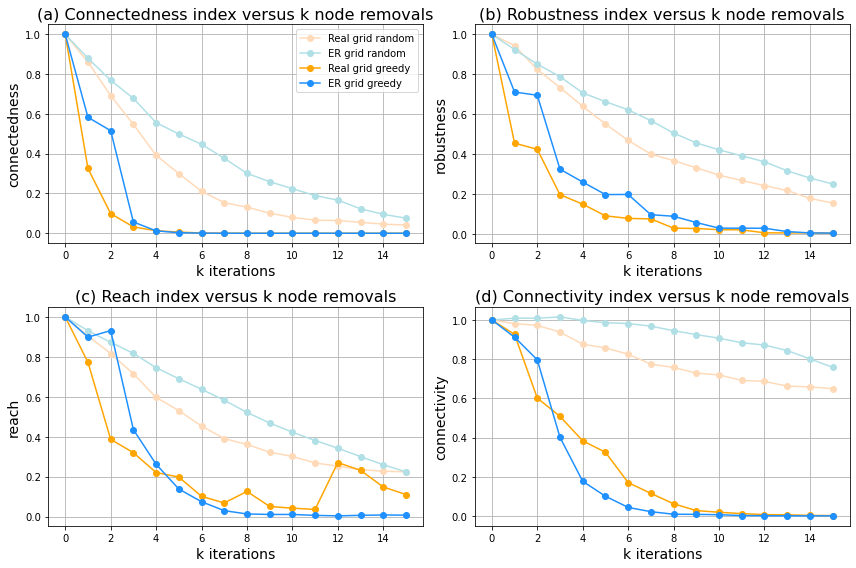

In [5]:


G = graphs[-1]
random_node_results_df, _ = utils.n_minus_k(G, n_benchmarks=n_benchmarks, k_removals=15, heuristic='random', remove='node')

G = graphs[-1]
greedy_node_results_df, _ = utils.n_minus_k(G, n_benchmarks=n_benchmarks, k_removals=15, heuristic='greedy', remove='node')

titles = ['(a) Connectedness index versus k node removals', '(b) Robustness index versus k node removals', '(c) Reach index versus k node removals', '(d) Connectivity index versus k node removals']

utils.plot_connectedness_fourway([random_node_results_df, greedy_node_results_df], titles)